In [62]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline 

from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import  Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [63]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [64]:
india_confirmed = confirmed_df[(confirmed_df['Country/Region'] == 'India') ].reset_index(drop=True)
india_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20
0,NaN,India,21.0,78.0,0,0,0,0,0,0,...,142,156,194,244,330,396,499,536,657,727


In [65]:
cols = confirmed_df.keys()


In [66]:
confirmed = india_confirmed.loc[:, cols[12]:cols[-1]]
dates=confirmed.keys()

In [67]:
df=pd.DataFrame(dates)
df=df.rename({0: "Date"},axis='columns')
df

,Date
0,1/30/20
1,1/31/20
2,2/1/20
3,2/2/20
4,2/3/20
5,2/4/20
6,2/5/20
7,2/6/20
8,2/7/20
9,2/8/20


In [68]:
df1=pd.DataFrame(confirmed.T)
df1=df1.reset_index(drop=True)
df1=df1.rename({0: "Confirmed"},axis='columns')
df1

,Confirmed
0,1
1,1
2,1
3,2
4,3
5,3
6,3
7,3
8,3
9,3


In [69]:
y = df.Date.values
y

array(['1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20',
       '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20',
       '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20',
       '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20',
       '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20',
       '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20',
       '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20',
       '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20',
       '3/24/20', '3/25/20', '3/26/20'], dtype=object)

In [70]:
x=df1.Confirmed.values
x

array([  1,   1,   1,   2,   3,   3,   3,   3,   3,   3,   3,   3,   3,
         3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,
         3,   3,   3,   3,   3,   3,   5,   5,  28,  30,  31,  34,  39,
        43,  56,  62,  73,  82, 102, 113, 119, 142, 156, 194, 244, 330,
       396, 499, 536, 657, 727], dtype=int64)

In [71]:
df2=pd.DataFrame([y,x])

In [72]:
data=df2.T
data=data.rename({0: "Date",1:"Confirmed"},axis='columns')

data

,Date,Confirmed
0,1/30/20,1
1,1/31/20,1
2,2/1/20,1
3,2/2/20,2
4,2/3/20,3
5,2/4/20,3
6,2/5/20,3
7,2/6/20,3
8,2/7/20,3
9,2/8/20,3


In [73]:
data.dtypes

Date         object
Confirmed    object
dtype: object

In [74]:
data['Confirmed']=data['Confirmed'].astype('int')

In [75]:
data.Date = pd.to_datetime(data.Date)
data=data.set_index('Date')
data

,Confirmed
Date,
2020-01-30,1
2020-01-31,1
2020-02-01,1
2020-02-02,2
2020-02-03,3
2020-02-04,3
2020-02-05,3
2020-02-06,3
2020-02-07,3


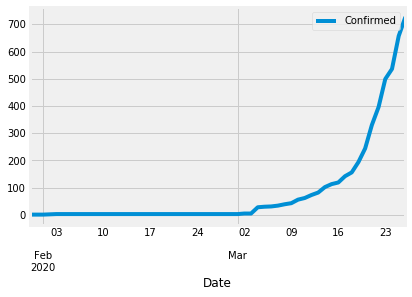

In [76]:
data.plot()

In [77]:
data.shape

(57, 1)

In [78]:
train,test=data[:-12],data[-12:]

In [79]:
test

,Confirmed
Date,
2020-03-15,113
2020-03-16,119
2020-03-17,142
2020-03-18,156
2020-03-19,194
2020-03-20,244
2020-03-21,330
2020-03-22,396
2020-03-23,499


In [80]:
scaler = MinMaxScaler()
scaler.fit(train)
train=scaler.transform(train)
test=scaler.transform(test)

C:\Users\VEERAMANI\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [81]:
n_input=12
n_features=1

generator=TimeseriesGenerator(train,train,length=n_input,batch_size=6)
model=Sequential()
model.add(LSTM(200,activation='relu',input_shape=(n_input,n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

model.fit(generator,epochs=180)

Epoch 1/180
6/6 [==============================] - 2s 291ms/step - loss: 0.1395
Epoch 2/180
6/6 [==============================] - 0s 29ms/step - loss: 0.1215
Epoch 3/180
6/6 [==============================] - 0s 26ms/step - loss: 0.0965
Epoch 4/180
6/6 [==============================] - 0s 31ms/step - loss: 0.0662
Epoch 5/180
6/6 [==============================] - 0s 32ms/step - loss: 0.0574
Epoch 6/180
6/6 [==============================] - 0s 26ms/step - loss: 0.0440
Epoch 7/180
6/6 [==============================] - 0s 39ms/step - loss: 0.0475
Epoch 8/180
6/6 [==============================] - 0s 51ms/step - loss: 0.0275
Epoch 9/180
6/6 [==============================] - 0s 36ms/step - loss: 0.0297
Epoch 10/180
6/6 [==============================] - 0s 31ms/step - loss: 0.0230
Epoch 11/180
6/6 [==============================] - 0s 32ms/step - loss: 0.0111
Epoch 12/180
6/6 [==============================] - 0s 29ms/step - loss: 0.0202
Epoch 13/180
6/6 [==============================

6/6 [==============================] - 0s 25ms/step - loss: 0.0036
Epoch 103/180
6/6 [==============================] - 0s 26ms/step - loss: 0.0035
Epoch 104/180
6/6 [==============================] - 0s 26ms/step - loss: 0.0042
Epoch 105/180
6/6 [==============================] - 0s 25ms/step - loss: 0.0043
Epoch 106/180
6/6 [==============================] - 0s 26ms/step - loss: 0.0049
Epoch 107/180
6/6 [==============================] - 0s 26ms/step - loss: 0.0036
Epoch 108/180
6/6 [==============================] - 0s 26ms/step - loss: 0.0033
Epoch 109/180
6/6 [==============================] - 0s 27ms/step - loss: 0.0045
Epoch 110/180
6/6 [==============================] - 0s 26ms/step - loss: 0.0039
Epoch 111/180
6/6 [==============================] - 0s 25ms/step - loss: 0.0035
Epoch 112/180
6/6 [==============================] - 0s 26ms/step - loss: 0.0039
Epoch 113/180
6/6 [==============================] - 0s 26ms/step - loss: 0.0035
Epoch 114/180
6/6 [=======================

In [82]:
pred_list=[]
batch=train[-n_input:].reshape((1,n_input,n_features))

for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch=np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

In [83]:
df_predict=pd.DataFrame(scaler.inverse_transform(pred_list),index=data[-n_input:].index,columns=['Predictions'])
df_test=pd.concat([data,df_predict],axis=1)

In [84]:
df_test.tail(12)

,Confirmed,Predictions
Date,,
2020-03-15,113,121.334102
2020-03-16,119,144.253709
2020-03-17,142,170.790993
2020-03-18,156,204.852520
2020-03-19,194,250.191876
2020-03-20,244,312.810179
2020-03-21,330,403.582948
2020-03-22,396,544.927453
2020-03-23,499,781.879396


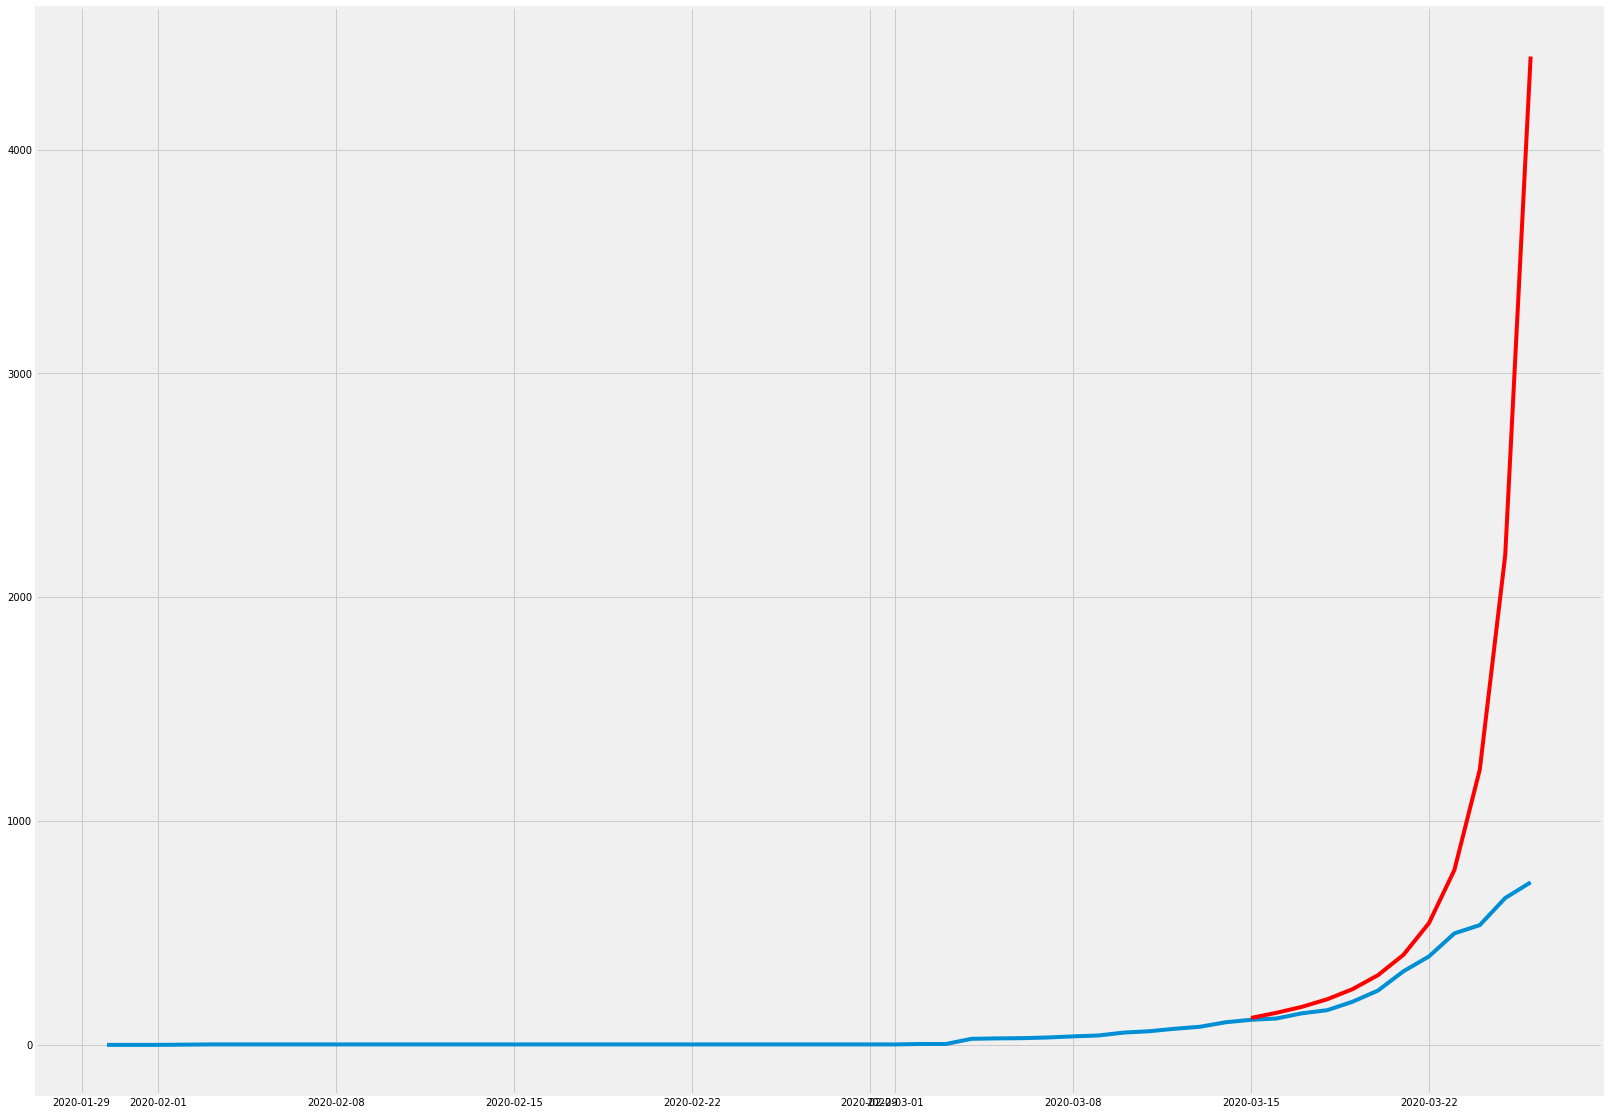

In [85]:
plt.figure(figsize=(25,20))
plt.plot(df_test.index,df_test['Confirmed'])
plt.plot(df_test.index,df_test['Predictions'],color='r')
plt.show()

In [86]:
train=data

scaler.fit(train)
train=scaler.transform(train) 

n_input=12
n_features=1

generator=TimeseriesGenerator(train,train,length=n_input,batch_size=6)

model.fit(generator,epochs=180)

pred_list=[]
batch=train[-n_input:].reshape((1,n_input,n_features))

for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch=np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

Epoch 1/180
6/8 [=====================>........] - ETA: 0s - loss: 0.0019   

C:\Users\VEERAMANI\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


8/8 [==============================] - 0s 26ms/step - loss: 0.0018
Epoch 2/180
8/8 [==============================] - 0s 25ms/step - loss: 0.0031
Epoch 3/180
8/8 [==============================] - 0s 25ms/step - loss: 0.0022
Epoch 4/180
8/8 [==============================] - 0s 28ms/step - loss: 0.0018
Epoch 5/180
8/8 [==============================] - 0s 26ms/step - loss: 9.6720e-04
Epoch 6/180
8/8 [==============================] - 0s 28ms/step - loss: 8.6144e-04
Epoch 7/180
8/8 [==============================] - 0s 29ms/step - loss: 9.3427e-04
Epoch 8/180
8/8 [==============================] - 0s 34ms/step - loss: 0.0014
Epoch 9/180
8/8 [==============================] - 0s 32ms/step - loss: 9.0866e-04
Epoch 10/180
8/8 [==============================] - 0s 26ms/step - loss: 8.7758e-04
Epoch 11/180
8/8 [==============================] - 0s 26ms/step - loss: 7.8947e-04
Epoch 12/180
8/8 [==============================] - 0s 26ms/step - loss: 0.0010
Epoch 13/180
8/8 [===================

8/8 [==============================] - 0s 25ms/step - loss: 6.3692e-04
Epoch 102/180
8/8 [==============================] - 0s 26ms/step - loss: 0.0011
Epoch 103/180
8/8 [==============================] - 0s 25ms/step - loss: 8.4152e-04
Epoch 104/180
8/8 [==============================] - 0s 32ms/step - loss: 6.5363e-04
Epoch 105/180
8/8 [==============================] - 0s 33ms/step - loss: 0.0018
Epoch 106/180
8/8 [==============================] - 0s 25ms/step - loss: 7.4951e-04
Epoch 107/180
8/8 [==============================] - 0s 25ms/step - loss: 0.0020 ETA: 0s - loss: 0.002
Epoch 108/180
8/8 [==============================] - 0s 25ms/step - loss: 0.0011
Epoch 109/180
8/8 [==============================] - 0s 26ms/step - loss: 0.0013
Epoch 110/180
8/8 [==============================] - 0s 25ms/step - loss: 0.0018
Epoch 111/180
8/8 [==============================] - 0s 25ms/step - loss: 7.4151e-04
Epoch 112/180
8/8 [==============================] - 0s 25ms/step - loss: 0.0011


In [87]:
from pandas.tseries.offsets import DateOffset
add_dates=[data.index[-1]+DateOffset(days=x) for x in range(0,13)]
future_dates=pd.DataFrame(index=add_dates[1:],columns=data.columns)

In [88]:
future_dates.tail(12)

,Confirmed
2020-03-27,NaN
2020-03-28,NaN
2020-03-29,NaN
2020-03-30,NaN
2020-03-31,NaN
2020-04-01,NaN
2020-04-02,NaN
2020-04-03,NaN
2020-04-04,NaN
2020-04-05,NaN


In [89]:
df_predict=pd.DataFrame(scaler.inverse_transform(pred_list),
                        index=future_dates[-n_input:].index,columns=['Predictions'])
df_proj=pd.concat([data,df_predict],axis=1)

In [90]:
df_proj.tail(12)

,Confirmed,Predictions
2020-03-27,NaN,772.840531
2020-03-28,NaN,853.892884
2020-03-29,NaN,939.309750
2020-03-30,NaN,1027.514088
2020-03-31,NaN,1118.150886
2020-04-01,NaN,1210.426864
2020-04-02,NaN,1303.538703
2020-04-03,NaN,1396.266278
2020-04-04,NaN,1488.434679
2020-04-05,NaN,1579.186237


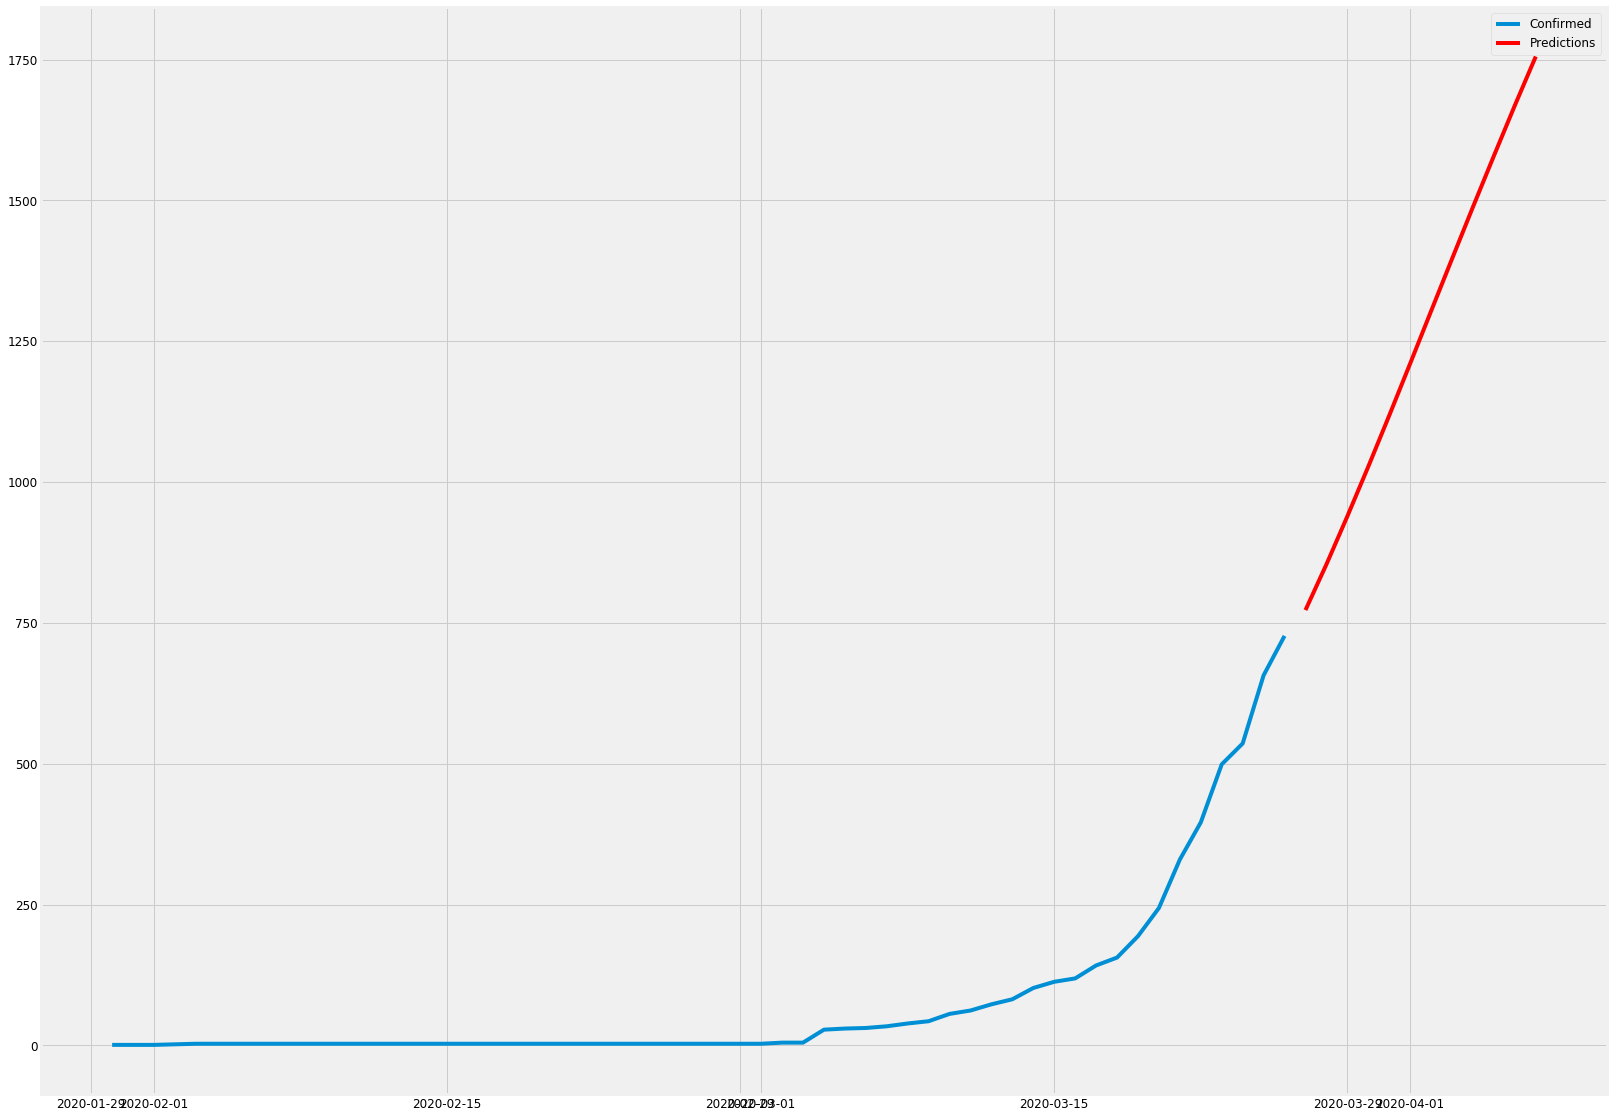

In [91]:
plt.figure(figsize=(25,20))
plt.plot(df_proj.index,df_proj['Confirmed'])
plt.plot(df_proj.index,df_proj['Predictions'],color='r')
plt.legend(loc='best',fontsize='large')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()